In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('2019.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
X = happines_data[['GDP per capita',
                   'Social support', 
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption']]

y = happines_data['Score']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# k-Nearest Neighbors Regression

In [4]:
from sklearn.neighbors import KNeighborsRegressor

regr = KNeighborsRegressor(n_neighbors=4,
                           p=4,
                           n_jobs=-1)

regr.fit(X_train, y_train)

print(f"""train: {regr.score(X_train, y_train)}\ntest: {regr.score(X_test, y_test)}""")

train: 0.8868721405506563
test: 0.7205442594991318


In [24]:
regr.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [42]:
for i in range(1,10):
    regr = KNeighborsRegressor(n_neighbors=4, p=i)
    regr.fit(X_train, y_train)

    print(f"""{i} - {regr.score(X_test, y_test)}""")

1 - 0.6167265182010825
2 - 0.6959109532243788
3 - 0.6952413111928408
4 - 0.7205442594991318
5 - 0.7091839375324709
6 - 0.7091839375324709
7 - 0.7036585673249718
8 - 0.7057436678623423
9 - 0.7140404738990811


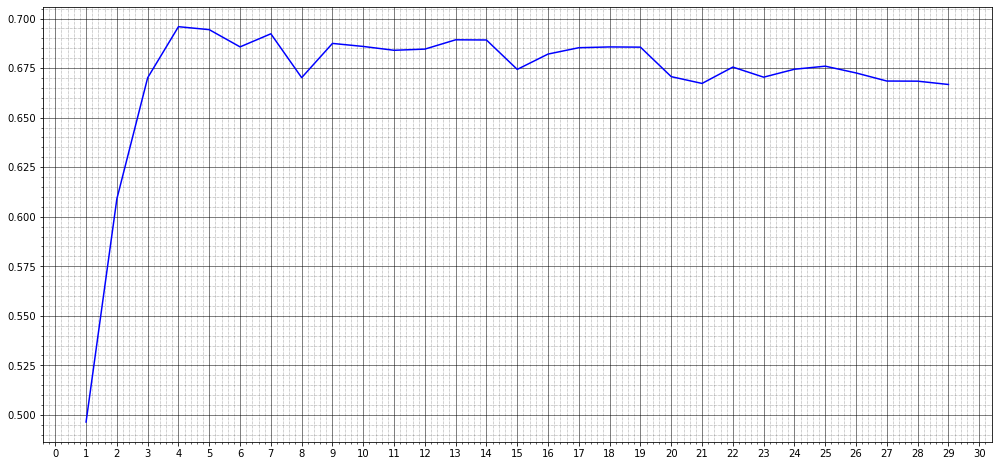

In [45]:
gammas = np.arange(1, 30, 1)

results = []

for feature in gammas:
    dt = KNeighborsRegressor(n_neighbors=feature)
    dt.fit(X_train, y_train)
        
    results.append(dt.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 
plt.plot(gammas, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))